In [16]:
pip install nibabel numpy matplotlib scipy pandas

ERROR: Could not find a version that satisfies the requirement pandas (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for pandas
ERROR: Could not find a version that satisfies the requirement pandas (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for pandas
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# -----------------------------------------------------------
# 01 — Introduction to Nibabel: Loading and Inspecting MRI
# -----------------------------------------------------------

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# --- Load MRI file ---
nii_path = "_PED_ROUTINE_BRAIN_RSUTH_20211008121356_1_i00001 2.nii"   # change path according to your dataset
img = nib.load(nii_path)


print("MRI img:", img)


MRI img: 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 5)
affine:
[[  -1.17190003    0.           -0.          149.41400146]
 [  -0.            1.17190003   -0.         -158.12049866]
 [   0.            0.           10.          -51.        ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 256 256   5   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.      1.1719  1.1719 10.      0.0465  0.      0.      0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max   

MRI shape: (256, 256, 5)
Data type: float64
Affine matrix:
 [[  -1.17190003    0.           -0.          149.41400146]
 [  -0.            1.17190003   -0.         -158.12049866]
 [   0.            0.           10.          -51.        ]
 [   0.            0.            0.            1.        ]]
Voxel dimensions: (np.float32(1.1719), np.float32(1.1719), np.float32(10.0))


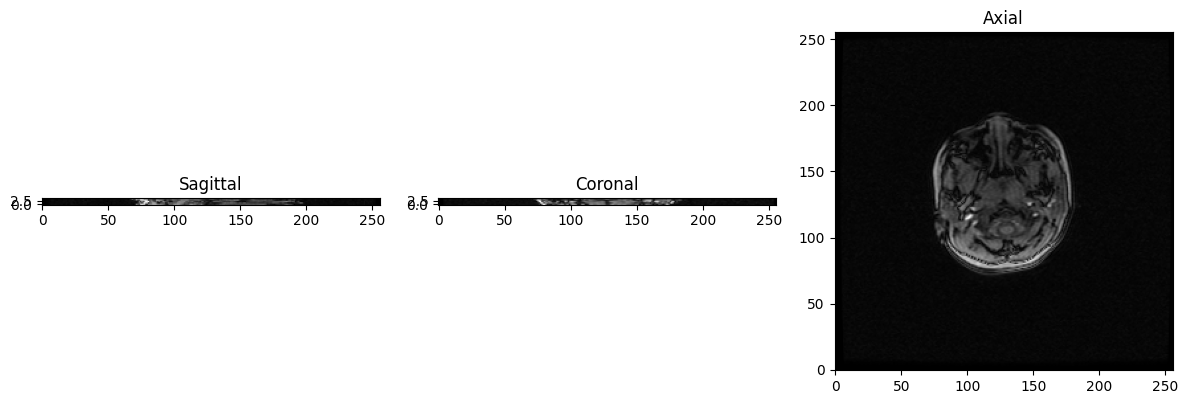

In [13]:

# --- Extract data and header ---
data = img.get_fdata()
affine = img.affine
header = img.header

print("MRI shape:", data.shape)
print("Data type:", data.dtype)
print("Affine matrix:\n", affine)
print("Voxel dimensions:", header.get_zooms())

# --- Visualize slices ---
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(data[data.shape[0]//2, :, :].T, cmap='gray', origin="lower")
plt.title("Sagittal")

plt.subplot(132)
plt.imshow(data[:, data.shape[1]//2, :].T, cmap='gray', origin="lower")
plt.title("Coronal")

plt.subplot(133)
plt.imshow(data[:, :, data.shape[2]//2].T, cmap='gray', origin="lower")
plt.title("Axial")

plt.tight_layout()
plt.show()


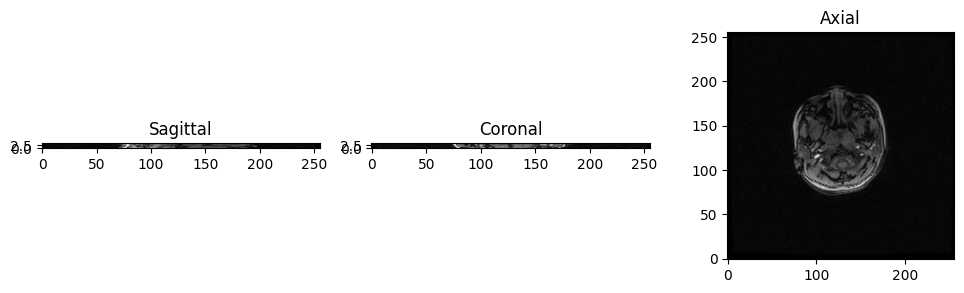

Mean intensity: 60.090704345703124
Median intensity: 31.0
Max: 1005.0
Min: 0.0


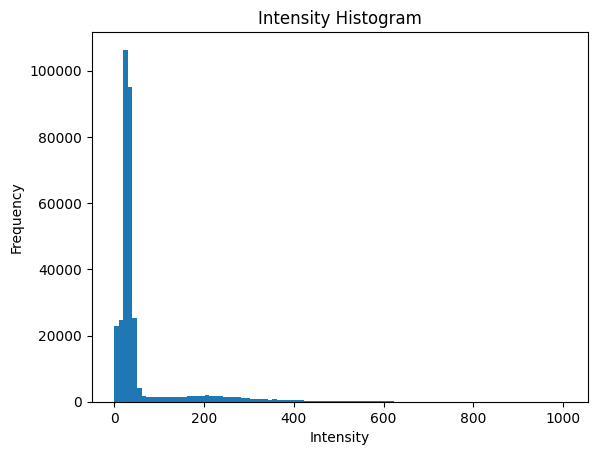

Brain voxel count: 310220
Brain mean intensity: 63.47276771323577


In [ ]:
# -----------------------------------------------------------
# 02 — NumPy for MRI: Slicing, Masking, Stats, Histogram
# -----------------------------------------------------------

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

nii_path = "_PED_ROUTINE_BRAIN_RSUTH_20211008121356_1_i00001 2.nii"
img = nib.load(nii_path)
data = img.get_fdata()

# --- Slice views using numpy indexing ---
axial_slice = data[:, :, data.shape[2]//2]
sagittal_slice = data[data.shape[0]//2, :, :]
coronal_slice = data[:, data.shape[1]//2, :]

plt.figure(figsize=(10,3))
plt.subplot(131); plt.imshow(sagittal_slice.T, cmap='gray', origin='lower'); plt.title("Sagittal")
plt.subplot(132); plt.imshow(coronal_slice.T, cmap='gray', origin='lower'); plt.title("Coronal")
plt.subplot(133); plt.imshow(axial_slice.T, cmap='gray', origin='lower'); plt.title("Axial")
plt.tight_layout()
plt.show()

# --- Basic stats ---
print("Mean intensity:", np.mean(data))
print("Median intensity:", np.median(data))
print("Max:", np.max(data))
print("Min:", np.min(data))

# --- Histogram ---
plt.hist(data.flatten(), bins=100)
plt.title("Intensity Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

# --- Masking: Simple brain mask (intensity threshold) ---
mask = data > 0  # crude brain mask
brain_only = data[mask]

print("Brain voxel count:", brain_only.shape[0])
print("Brain mean intensity:", brain_only.mean())


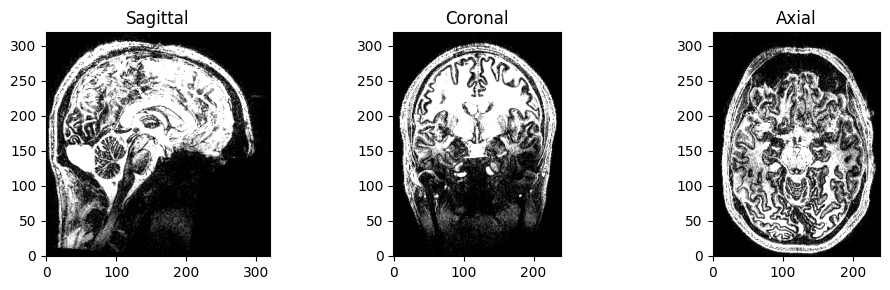

Mean intensity: 52.36665284716081
Median intensity: 0.0
Max: 225.0
Min: 0.0
Median intensity: 0.0
Max: 225.0
Min: 0.0


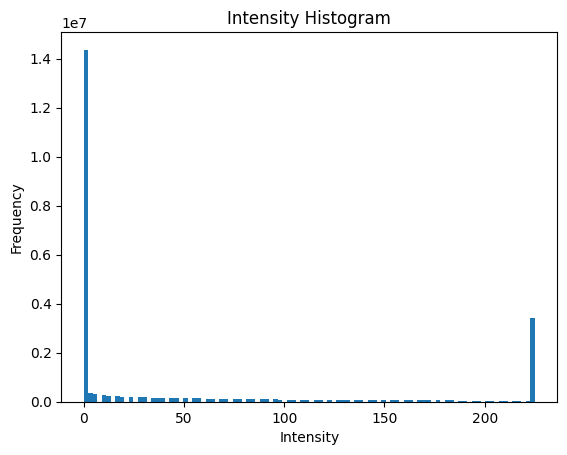

Brain voxel count: 10211821
Brain mean intensity: 126.02677430125577


In [14]:
# -----------------------------------------------------------
# 02 — NumPy for MRI: Slicing, Masking, Stats, Histogram
# -----------------------------------------------------------

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

nii_path = "sub-S04_acq-inv1_T1w 2.nii"
img = nib.load(nii_path)
data = img.get_fdata()

# --- Slice views using numpy indexing ---
axial_slice = data[:, :, data.shape[2]//2]
sagittal_slice = data[data.shape[0]//2, :, :]
coronal_slice = data[:, data.shape[1]//2, :]

plt.figure(figsize=(10,3))
plt.subplot(131); plt.imshow(sagittal_slice.T, cmap='gray', origin='lower'); plt.title("Sagittal")
plt.subplot(132); plt.imshow(coronal_slice.T, cmap='gray', origin='lower'); plt.title("Coronal")
plt.subplot(133); plt.imshow(axial_slice.T, cmap='gray', origin='lower'); plt.title("Axial")
plt.tight_layout()
plt.show()

# --- Basic stats ---
print("Mean intensity:", np.mean(data))
print("Median intensity:", np.median(data))
print("Max:", np.max(data))
print("Min:", np.min(data))

# --- Histogram ---
plt.hist(data.flatten(), bins=100)
plt.title("Intensity Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

# --- Masking: Simple brain mask (intensity threshold) ---
mask = data > 0  # crude brain mask
brain_only = data[mask]

print("Brain voxel count:", brain_only.shape[0])
print("Brain mean intensity:", brain_only.mean())


In [9]:
pip install scipy

  Using cached scipy-1.16.3-cp313-cp313-macosx_12_0_arm64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/28.9 MB ? eta -:--:--Downloading scipy-1.16.3-cp313-cp313-macosx_12_0_arm64.whl (28.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 582.9 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 582.9 kB/s eta 0:00:00

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


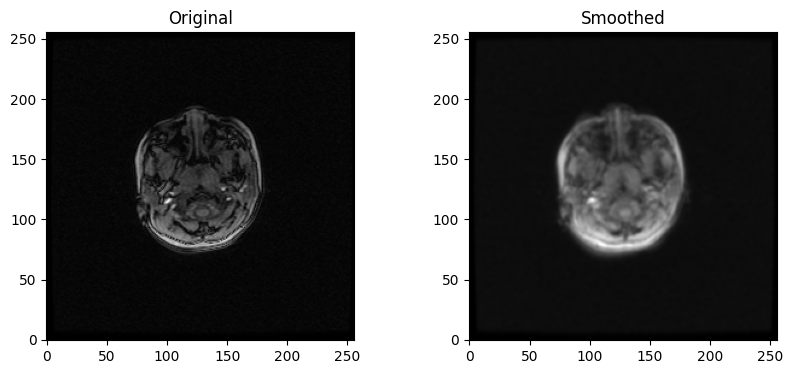

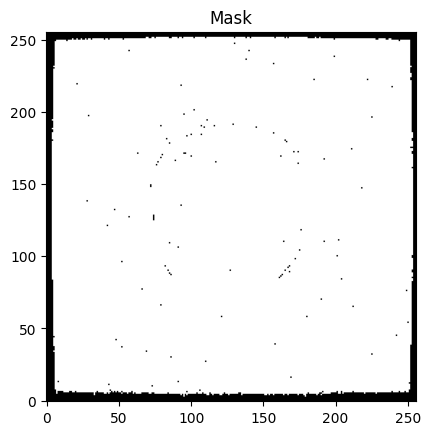

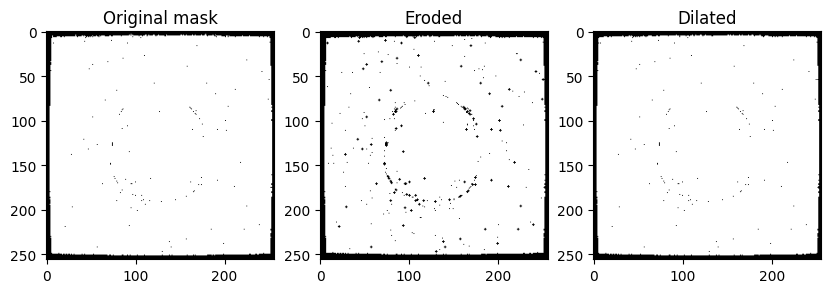

In [14]:
# -----------------------------------------------------------
# 03 — MRI Image Processing: Filtering and Morphology
# -----------------------------------------------------------

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, binary_erosion, binary_dilation

nii_path = "_PED_ROUTINE_BRAIN_RSUTH_20211008121356_1_i00001 2.nii"
data = nib.load(nii_path).get_fdata()

# --- Gaussian smoothing ---
smooth = gaussian_filter(data, sigma=1)

slice_idx = data.shape[2]//2
plt.figure(figsize=(10,4))
plt.subplot(121); plt.imshow(data[:, :, slice_idx].T, cmap='gray', origin='lower'); plt.title("Original")
plt.subplot(122); plt.imshow(smooth[:, :, slice_idx].T, cmap='gray', origin='lower'); plt.title("Smoothed")
plt.show()

# --- Binary mask ---
mask = data > 10   # crude threshold
plt.imshow(mask[:, :, slice_idx].T, cmap='gray', origin='lower')
plt.title("Mask")
plt.show()

# --- Morphology: clean mask ---
eroded = binary_erosion(mask)
dilated = binary_dilation(eroded)

plt.figure(figsize=(10,4))
plt.subplot(131); plt.imshow(mask[:, :, slice_idx].T, cmap='gray'); plt.title("Original mask")
plt.subplot(132); plt.imshow(eroded[:, :, slice_idx].T, cmap='gray'); plt.title("Eroded")
plt.subplot(133); plt.imshow(dilated[:, :, slice_idx].T, cmap='gray'); plt.title("Dilated")
plt.show()


In [17]:
pip install pandas

   ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/10.7 MB ? eta -:--:--3:42━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.7 MB ? eta -:--:--

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
error: incomplete-download

× Download failed because not enough bytes were received (786 kB/10.7 MB)
╰─> URL: https://files.pythonhosted.org/packages/31/94/72fac03573102779920099bcac1c3b05975c2cb5f01eac609faf34bed1ca/pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl

note: This is an issue with network connectivity, not pip.
hint: Consider using --resume-retries to enable download resumption.
   ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/10.7 MB ? eta -:--:--

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
error: incomplete-download

× Download failed because not enough bytes were received (786 kB/10.7 MB)
╰─> URL: https://files.pythonhosted.org/packages/31/94/72fac03573102779920099bcac1

In [7]:
# -----------------------------------------------------------
# 04 — Mini Project: Loop Through Subjects & Extract Stats
# -----------------------------------------------------------
# TASK:
# For each subject/file:
# 1. Load T1w MRI
# 2. Apply threshold mask
# 3. Compute mean, min, max, histogram peak
# 4. Save results into a CSV

import os
import pandas as pd
import nibabel as nib
import numpy as np

data_dir = "./datasets"   # folder containing NIfTI files
nii_files = sorted([f for f in os.listdir(data_dir) if f.endswith((".nii", ".nii.gz"))])

if not nii_files:
    print("No NIfTI files found in ./datasets")
    results = []
else:
    results = []

    for fname in nii_files:
        path = os.path.join(data_dir, fname)
        sub_id = os.path.splitext(os.path.splitext(fname)[0])[0]  # strip .nii or .nii.gz
        print("Processing:", sub_id)

        img = nib.load(path)
        data = img.get_fdata()

        mask = data > 0  # crude brain mask
        vox = data[mask]

        hist_counts, bin_edges = np.histogram(vox, bins=100)
        hist_peak = bin_edges[hist_counts.argmax()]

        results.append({
            "subject": sub_id,
            "mean_intensity": float(np.mean(vox)),
            "median_intensity": float(np.median(vox)),
            "max_intensity": float(np.max(vox)),
            "min_intensity": float(np.min(vox)),
            "voxel_count": int(vox.shape[0]),
            "hist_peak": float(hist_peak)
        })

    df = pd.DataFrame(results)
    df.to_csv("summary_stats.csv", index=False)
    df


Processing: _PED_ROUTINE_BRAIN_RSUTH_20211008121356_1_i00001 2
Processing: _PED_ROUTINE_BRAIN_RSUTH_20211008121356_1_i00001
Processing: _PED_ROUTINE_BRAIN_RSUTH_20211008121356_1_i00006 2
Processing: _PED_ROUTINE_BRAIN_RSUTH_20211008121356_1_i00006
